In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pmdarima.arima import auto_arima

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import timedelta



In [5]:

df = pd.read_csv('Telkom.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3750.0,3790.0,3690.0,3770.0,3249.883301,272812700
1,2019-01-08,3770.0,3860.0,3730.0,3850.0,3318.845947,478130500
2,2019-01-15,3860.0,4050.0,3850.0,4030.0,3474.012939,460955700
3,2019-01-22,4000.0,4010.0,3730.0,3780.0,3258.503418,531602600
4,2019-01-29,3780.0,3930.0,3780.0,3780.0,3258.503418,464647400
...,...,...,...,...,...,...,...
174,2022-05-03,4560.0,4560.0,4300.0,4310.0,4157.917480,343682000
175,2022-05-10,4120.0,4480.0,4120.0,4260.0,4109.681641,860249400
176,2022-05-17,4250.0,4290.0,4070.0,4110.0,3964.974609,807191200
177,2022-05-24,4120.0,4340.0,4120.0,4250.0,4100.034668,612416700


In [6]:
df = df[['Date','Close']]
df

,Date,Close
0,2019-01-01,3770.0
1,2019-01-08,3850.0
2,2019-01-15,4030.0
3,2019-01-22,3780.0
4,2019-01-29,3780.0
...,...,...
174,2022-05-03,4310.0
175,2022-05-10,4260.0
176,2022-05-17,4110.0
177,2022-05-24,4250.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True) 
df['Close']=df['Close'].astype(float)
df

,Close
Date,
2019-01-01,3770.0
2019-01-08,3850.0
2019-01-15,4030.0
2019-01-22,3780.0
2019-01-29,3780.0
...,...
2022-05-03,4310.0
2022-05-10,4260.0
2022-05-17,4110.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2019-01-01 to 2022-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   179 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


<AxesSubplot:xlabel='Date'>

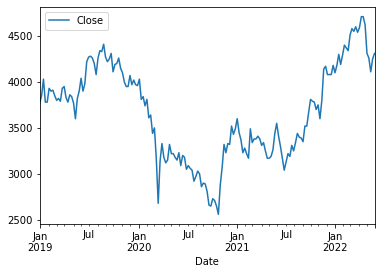

In [8]:
df.info()
df.plot()


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,179.0,3664.581006,507.912912,2560.0,3230.0,3740.0,4080.0,4710.0


<Figure size 432x288 with 0 Axes>

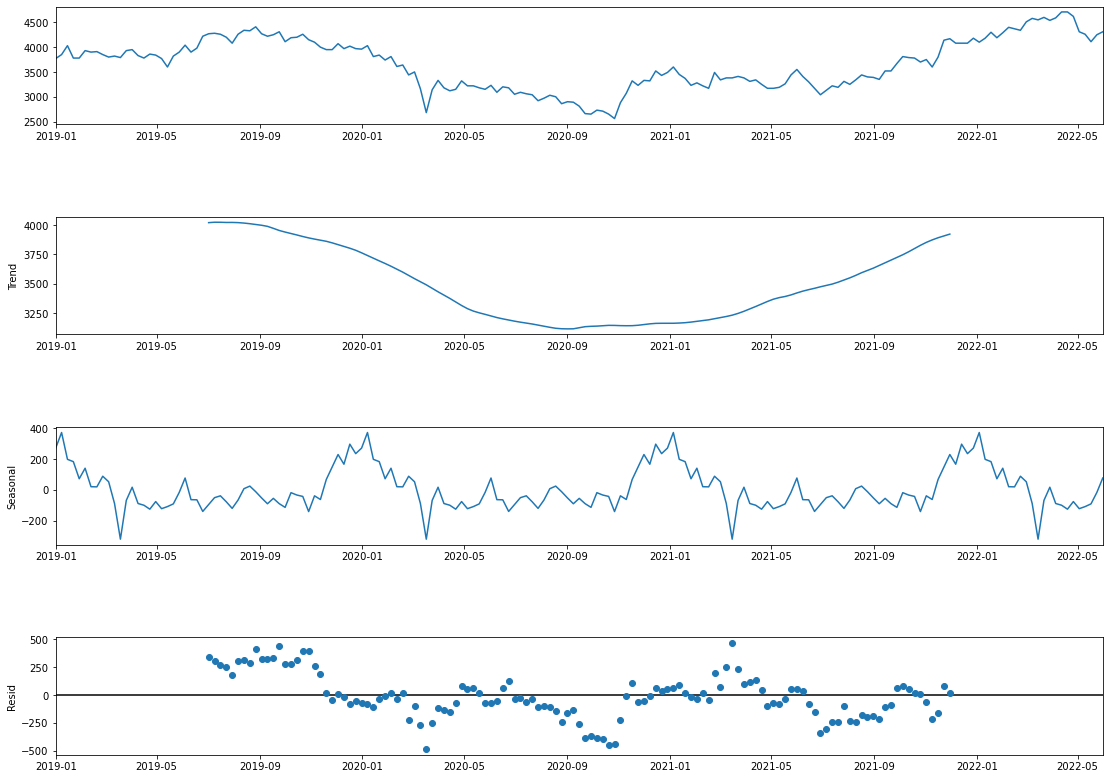

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='addictive')

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 12)

In [11]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Close'])

In [12]:
#tes stasioner

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.3935667239077703
p-value: 0.5853563962991678
Critical Values:
	1%: -3.467631519151906
	5%: -2.8779183721695567
	10%: -2.575501353364474


In [13]:
df['1diff'] = df['Close'] - df['Close'].shift(1)
df['2diff'] = df['1diff'] - df['1diff'].shift(1)

In [14]:
result=adfuller(df['1diff'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -13.782932363137938
p-value: 9.224170859209893e-26
Critical Values:
	1%: -3.467845319799907
	5%: -2.878011745497439
	10%: -2.575551186759871


In [15]:
result=adfuller(df['2diff'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -8.25689956704028
p-value: 5.207762251052102e-13
Critical Values:
	1%: -3.469648263987657
	5%: -2.878798906308495
	10%: -2.5759713094779593


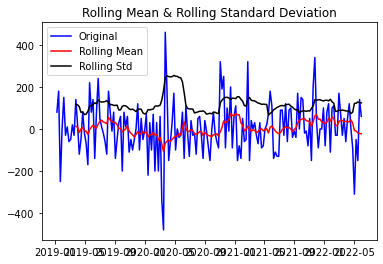

In [16]:
rolling_mean = df['1diff'].rolling(window = 12).mean()
rolling_std = df['1diff'].rolling(window = 12).std()
plt.plot(df['1diff'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

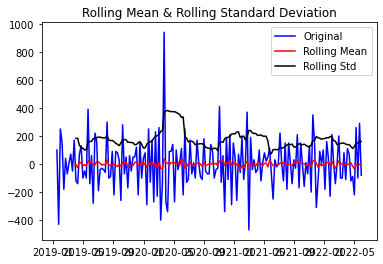

In [17]:
rolling_mean = df['2diff'].rolling(window = 12).mean()
rolling_std = df['2diff'].rolling(window = 12).std()
plt.plot(df['2diff'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

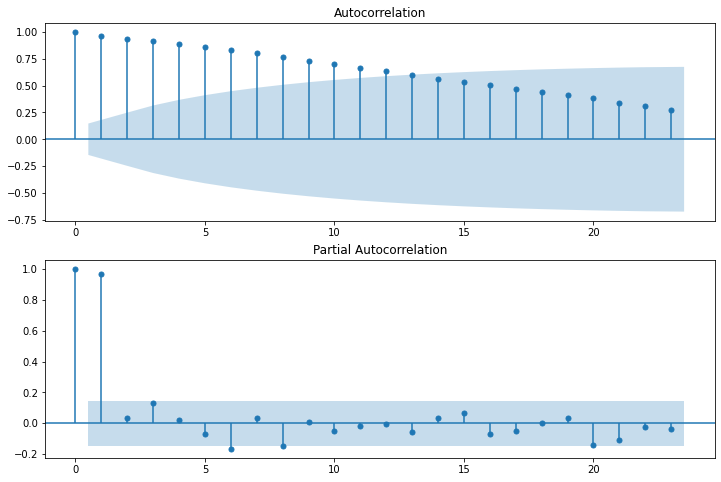

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Close, ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Close, ax=ax2, )

In [19]:
from statsmodels.tsa.stattools import acf
print(acf(df['Close']))

[ 1.          0.96547797  0.93400456  0.91103259  0.88912644  0.86280669
  0.82842518  0.79897784  0.76474705  0.7318572   0.69800789  0.66375714
  0.6311818   0.59530021  0.56357743  0.53541896  0.50415524  0.47043079
  0.43872518  0.41240335  0.37965562  0.34218569  0.30784296  0.27526217
  0.2488574   0.22047236  0.19544535  0.16859213  0.13300644  0.09617621
  0.06460972  0.03743868  0.01317479 -0.01666116 -0.04764041 -0.07353561
 -0.09230929 -0.11248795 -0.12800984 -0.13416763 -0.14495378]


In [20]:
from statsmodels.tsa.stattools import pacf
print(pacf(df['Close']))

[ 1.00000000e+00  9.70902001e-01  3.32625637e-02  1.34370975e-01
  2.06727039e-02 -6.96399021e-02 -1.66164419e-01  3.22767754e-02
 -1.49666193e-01  8.90951090e-03 -5.07035071e-02 -1.60744428e-02
 -6.14995095e-03 -5.55415428e-02  3.68284512e-02  6.32271937e-02
 -7.04377039e-02 -5.30142134e-02  1.44927012e-03  3.13364320e-02
 -1.41005623e-01 -1.10066643e-01 -2.47799687e-02 -3.71701861e-02
  1.05032860e-01  4.41735368e-03  8.32432852e-02 -5.68093615e-02
 -2.17409084e-01 -1.63266717e-01  6.33642686e-04 -1.78178601e-02
  1.59052598e-01 -8.71559471e-02 -9.23560389e-02  2.77194008e-02
  1.40962244e-01 -1.33359458e-02  1.94906772e-01  2.16670509e-01
 -8.31251622e-02]


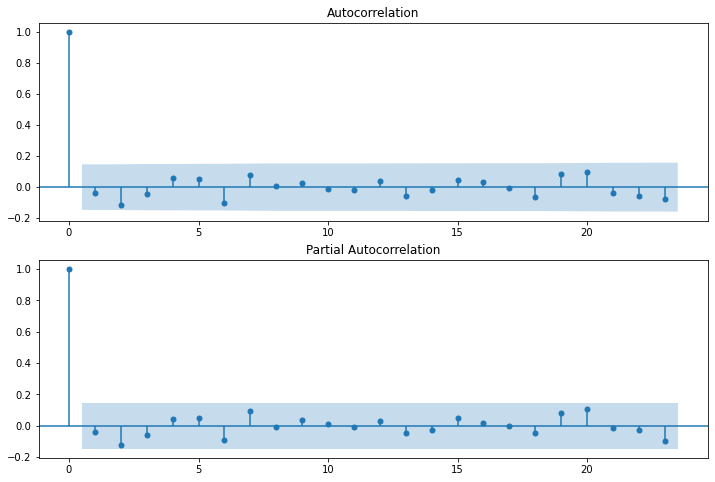

In [21]:
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['1diff'].dropna(), ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['1diff'].dropna(), ax=ax2, )

In [22]:
from statsmodels.tsa.stattools import acf
print(acf(df['1diff'].dropna()))

[ 1.         -0.04046557 -0.11646927 -0.04409947  0.06156343  0.05550957
 -0.10361027  0.07883833  0.00725292  0.02891921 -0.00906854 -0.01601761
  0.04217834 -0.05461864 -0.01567804  0.0461746   0.03043036 -0.00770536
 -0.06447624  0.08744524  0.0984341  -0.03691866 -0.05396514 -0.07480687
  0.02990548 -0.06541218  0.00750196  0.15302863  0.1020873  -0.03821251
 -0.10407083 -0.04333434  0.07194189  0.01766933 -0.09240341 -0.08040455
  0.06143099 -0.07847983 -0.11821169  0.07647317  0.05046345]


In [23]:
from statsmodels.tsa.stattools import pacf
print(pacf(df['1diff'].dropna()))

[ 1.         -0.04069419 -0.11964694 -0.05598423  0.04481514  0.05160043
 -0.09374229  0.09286017 -0.0053086   0.03640286  0.00909065 -0.00776455
  0.02907706 -0.04725485 -0.02632677  0.0498319   0.01999168  0.00158682
 -0.04752824  0.08065243  0.10803042 -0.01326858 -0.0280523  -0.09606981
 -0.02201414 -0.08816555  0.00563427  0.16970143  0.15245295  0.00145388
 -0.0663787  -0.11748831  0.04514293  0.04387553 -0.10655797 -0.1412843
  0.00567988 -0.14149694 -0.14647173  0.08460557  0.07870345]


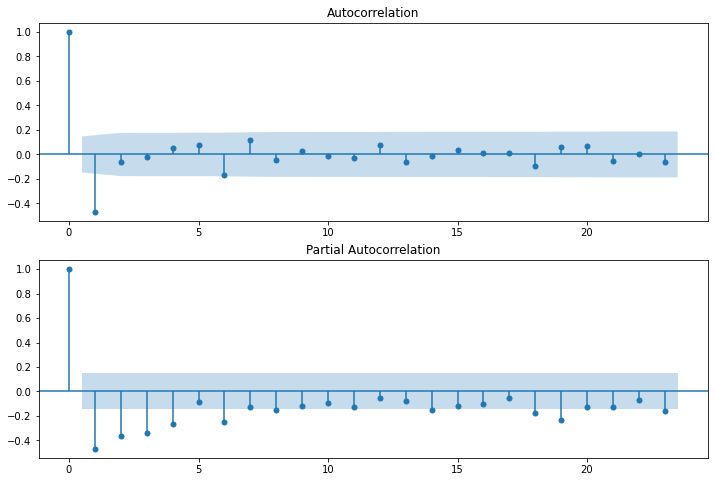

In [24]:
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['2diff'].dropna(), ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['2diff'].dropna(), ax=ax2, )

In [25]:
from statsmodels.tsa.stattools import acf
print(acf(df['2diff'].dropna()))

[ 1.         -0.46637499 -0.06270217 -0.02040487  0.0543368   0.07390576
 -0.16584751  0.12202292 -0.04431763  0.02886583 -0.0153628  -0.03285679
  0.07522488 -0.06443679 -0.0099733   0.03559042  0.01073126  0.00974873
 -0.09699625  0.06026139  0.07273045 -0.05615896  0.00381507 -0.06240728
  0.09411287 -0.07750945 -0.03560986  0.09187718  0.04495683 -0.03151955
 -0.06699126 -0.0236029   0.08212463  0.02573983 -0.05737821 -0.0638065
  0.13603098 -0.05032277 -0.10721381  0.1021404   0.01448532]


In [26]:
from statsmodels.tsa.stattools import pacf
print(pacf(df['2diff'].dropna()))

[ 1.00000000e+00 -4.69024851e-01 -3.63329973e-01 -3.42250588e-01
 -2.63835987e-01 -8.98480842e-02 -2.49592133e-01 -1.29087790e-01
 -1.53455110e-01 -1.17665181e-01 -9.44541150e-02 -1.29950357e-01
 -5.47697881e-02 -7.68123870e-02 -1.49899558e-01 -1.20340515e-01
 -1.03040104e-01 -5.67835523e-02 -1.79725252e-01 -2.30468645e-01
 -1.29722635e-01 -1.30930734e-01 -7.08047567e-02 -1.57431669e-01
 -1.15220282e-01 -2.36714590e-01 -5.01703457e-01 -8.91214906e-01
 -6.68546334e+00  1.16137053e+00  5.62696144e-01  2.58046518e-01
  2.10809696e-01  2.98194567e-01  2.78897601e-01  1.10715521e-01
  2.36652016e-01  2.20610063e-01 -5.97037357e-03  7.66864129e-03
  4.57191067e-02]


In [27]:
print(df.shape)
train=df.iloc[:len(df)-35]
test=df.iloc[len(df)-35:]
print(train.shape,test.shape)


(179, 3)
(144, 3) (35, 3)


In [28]:
from statsmodels.tsa.arima_model import ARIMA
data = train['Close']
model1 = ARIMA(data, order=(0,2,1))
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                  177
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1107.257
Method:                       css-mle   S.D. of innovations            124.231
Date:                Tue, 28 Feb 2023   AIC                           2220.515
Time:                        16:35:25   BIC                           2230.043
Sample:                    01-15-2019   HQIC                          2224.379
                         - 05-31-2022                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1430      0.181      0.789      0.430      -0.212       0.498
ma.L1.D2.Close    -0.9999      0.018    -56.667      0.000      -1.035      -0.965
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

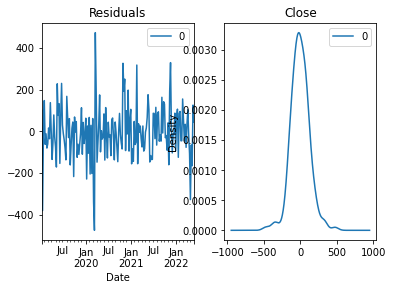

In [29]:
residuals = pd.DataFrame(model1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Close', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='Date'>

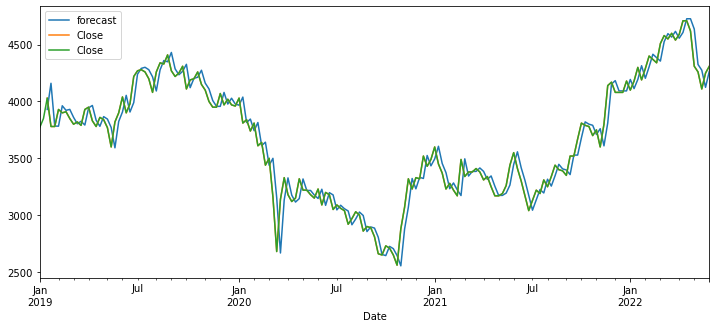

In [36]:
pred = model1.plot_predict(dynamic=False)
train['Close'].plot(figsize = (12, 5), legend=True)

In [38]:
fc, se, conf = model1.forecast(35, alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [39]:
def metrics (forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    return({'mape':mape})

In [ ]:
metrics(fc, test['Close'])

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['Close'], label='training')
plt.plot(test['Close'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
gffrom statsmodels.tsa.arima_model import ARIMA
data = df['Close'].dropna()
model = ARIMA(data, order=(0,2,1))
model = model.fit()
model.summary()

SyntaxError: invalid syntax (Temp/ipykernel_6108/212452378.py, line 1)

In [ ]:
pred=model.predict().rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
df['2diff'].plot(figsize = (12, 5), legend=True)
pred

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred= model1.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [ ]:
start=144
end=200
forecast = model1.predict(start = start,  

                          end = end , 

                          typ = 'levels').rename('Forecast') 

In [ ]:
df['Close'].plot(figsize = (12, 5), legend = True) 

forecast.plot(legend = True)


forecast

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Close'], pred)
print('MAE: %f' % mae)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test['Close'], pred)
print('MAPE: %f' % mape)

In [ ]:
mape*100